### Load FODO lattice

In [20]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import os
from math import sqrt

import apace as ap

file_path = os.path.join("lattices", "fodo_ring.json")
fodo = ap.load_lattice(file_path)

### Example 1: Get tune from Fourier-Transform of transversal particle offset at fixed position

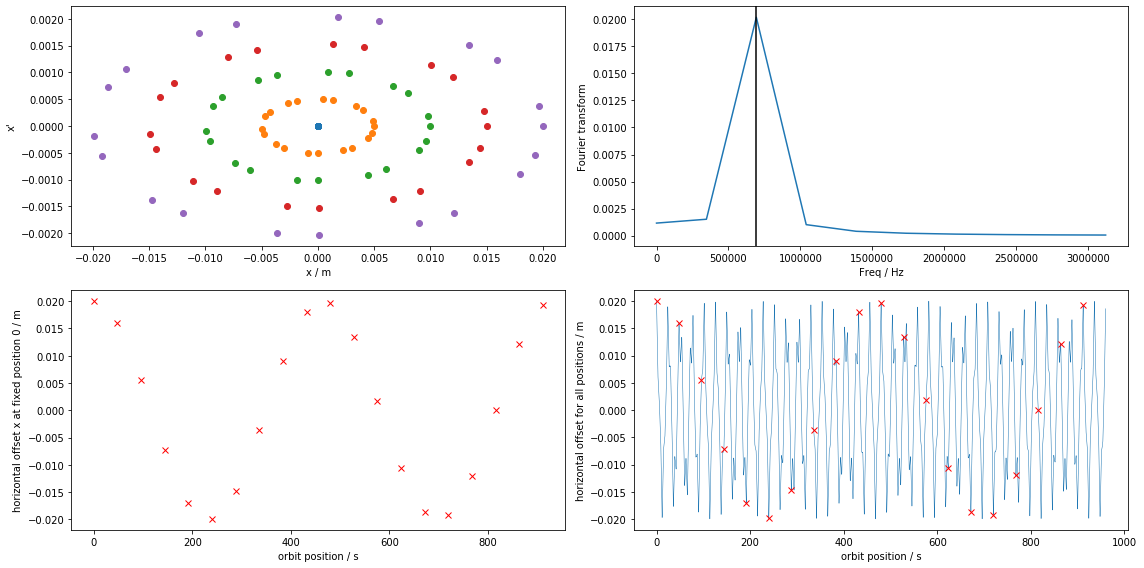

In [30]:
n_particles = 5
n_turns = 20
position = 0
particles = ap.create_particle_distribution(
    n_particles, x_dist="uniform", x_width=0.02, x_center=0.01
)
matrix_tracking = ap.MatrixTracking(fodo, particles, turns=n_turns, positions=0)
tracking_data = matrix_tracking.particle_trajectories

# Plot x-x' phase space
plt.subplot(2, 2, 1)

for i in range(n_particles):
    plt.plot(tracking_data[:, 0, i], tracking_data[:, 1, i], "o")

plt.xlabel("x / m")
plt.ylabel("x'")

freq = np.linspace(0.0, 1.0 / (2.0 * fodo.length / 299_792_458), n_turns // 2)
fft_tracking = 2.0 / n_turns * np.abs(fft(tracking_data[:, 0, -1])[: n_turns // 2])
main_freq = freq[np.argmax(fft_tracking)]

# Plot horizontal frequency spectrum
plt.subplot(2, 2, 2)
plt.plot(freq, fft_tracking)
plt.xlabel("Freq / Hz")
plt.ylabel("Fourier transform")
plt.axvline(x=main_freq, color="k")

# Plot horizontal offset for fixed position
plt.subplot(2, 2, 3)
plt.plot(matrix_tracking.orbit_position, tracking_data[:, 0, -1], 'rx')
plt.xlabel(f"orbit position / s")
plt.ylabel(f"horizontal offset x at fixed position {position} / m")

# Plot horizontal offset for multiple positions
matrix_tracking_all_positions = ap.MatrixTracking(fodo, particles, turns=n_turns, positions=None)
track_all_positions = matrix_tracking_all_positions.particle_trajectories

plt.subplot(2, 2, 4)
plt.plot(matrix_tracking_all_positions.orbit_position, track_all_positions[:, 0, -1], linewidth=0.5)
plt.plot(matrix_tracking.orbit_position, tracking_data[:, 0, -1], 'rx')
plt.xlabel("orbit position / s")
plt.ylabel("horizontal offset for all positions / m")


plt.gcf().set_size_inches(16, 8)
plt.tight_layout()

### Example 2: Beam envelope from beta functions

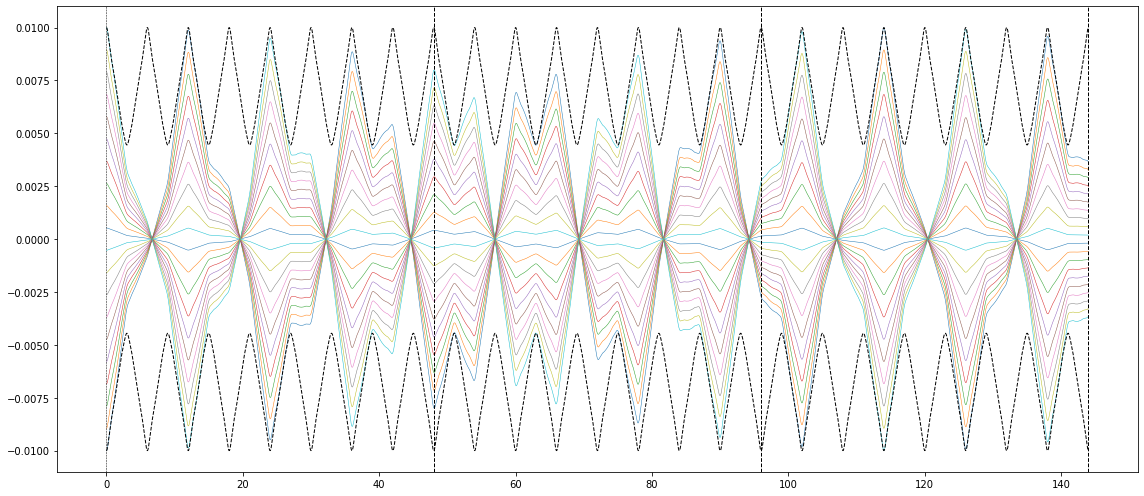

In [31]:
x_width = 0.02
n_turns = 3
dist = ap.create_particle_distribution(20, x_dist="uniform", x_width=x_width)
matrix_tracking = ap.MatrixTracking(fodo, dist, turns=n_turns, positions=None)
twiss = ap.Twiss(fodo)

fig, ax = plt.subplots()
ax.plot(matrix_tracking.orbit_position, matrix_tracking.x, linewidth=0.5)
beam_size = np.sqrt(twiss.beta_x) * (x_width / 2 / sqrt(twiss.beta_x[0]))

ax.axvline(x=0, color="k", linestyle="--", linewidth=0.5)
for i in range(n_turns):
    s = twiss.s + fodo.length * i
    ax.plot(s, beam_size, "k--", s, -beam_size, "k--", linewidth=1.0)
    ax.axvline(x=fodo.length * (i + 1), color="k", linestyle="--", linewidth=1.0)

plt.gcf().set_size_inches(16, 7)
fig.tight_layout()